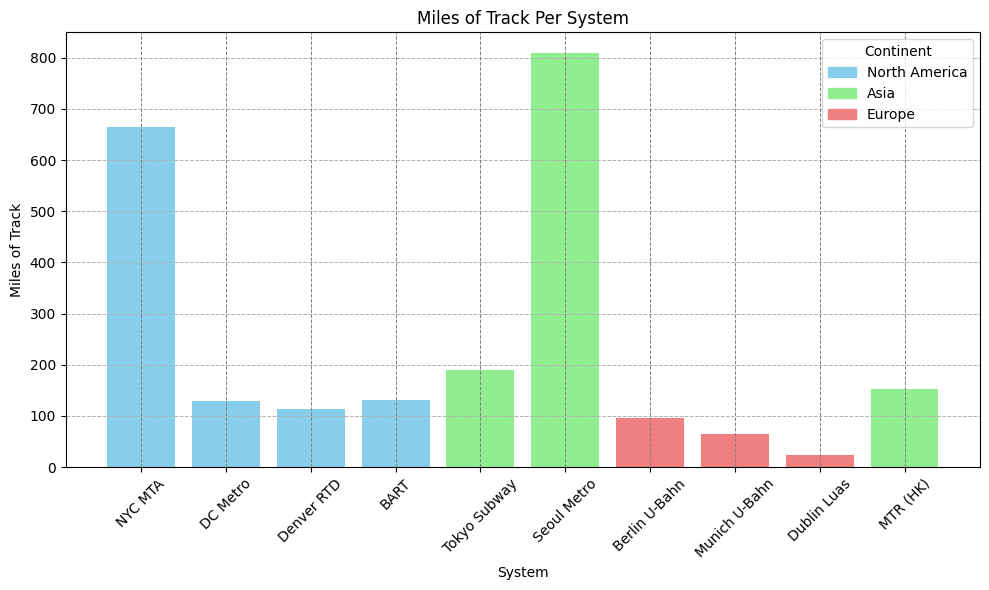

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'miles_of_track.xlsx'
data = pd.read_excel(file_path)

data['Miles of Track'] = data['Miles of Track'].astype(str).str.replace(' ', '').str.replace(',', '').astype(float)

continent_map = {
    'NYC MTA': 'North America',
    'DC Metro': 'North America',
    'Denver RTD': 'North America',
    'BART': 'North America',
    'Tokyo Subway': 'Asia',
    'Seoul Metro': 'Asia',
    'MTR (HK)': 'Asia',
    'Berlin U-Bahn': 'Europe',
    'Munich U-Bahn': 'Europe',
    'Dublin Luas': 'Europe'
}

data['Continent'] = data['System'].map(continent_map)

colors = {
    'North America': 'skyblue',
    'Asia': 'lightgreen',
    'Europe': 'lightcoral'
}

data['Color'] = data['Continent'].map(colors)

plt.figure(figsize=(10, 6))
bars = plt.bar(data['System'], data['Miles of Track'], color=data['Color'])
plt.xlabel('System')
plt.ylabel('Miles of Track')
plt.title('Miles of Track Per System')
plt.xticks(rotation=45)

for i in range(len(bars)):
    plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.7)

plt.grid(axis='y', linestyle='--', linewidth=0.7)

handles = [plt.Rectangle((0,0),1,1, color=colors[continent]) for continent in colors]
labels = colors.keys()
plt.legend(handles, labels, title='Continent')

plt.tight_layout()
plt.show()
